# Import Libs

## System

Change directory to main

In [1]:
import os
# Change dir
os.chdir('C:\\Users\\ThalesFerreira\\projetos python\\data_view\\shipping_data')
#import models and libs
import joblib

## Data

### Import libs to analyse data

In [ ]:
# treat data
import pandas as pd 
import numpy as np
# data scaling data
from sklearn.preprocessing import StandardScaler
# data labelencoder
from sklearn.preprocessing import LabelEncoder
# data onehotencoder
from sklearn.preprocessing import OneHotEncoder
# multilinear correlations
from statsmodels.stats.outliers_influence import variance_inflation_factor
# anomalies
from sklearn.neighbors import LocalOutlierFactor

In [94]:
# plot graphcs of data
import matplotlib.pyplot as plt
import seaborn as sns

## Models


### Import libs divinding data and analyse models results

In [3]:
# calcular score do modelo
from sklearn.metrics import accuracy_score, classification_report
#Metricas para avaliação do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
#Divisão de bases e crossvalidation.
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# Confusion matrix
from yellowbrick.classifier import ConfusionMatrix


### Statistical validation

In [92]:
#Anova
from scipy.stats import f_oneway
#normalization teste
from scipy.stats import shapiro
#Turkey teste
from statsmodels.stats.multicomp import MultiComparison

### Import libs models

In [ ]:
#ramdom parameters
from sklearn.model_selection import RandomizedSearchCV
# tests models
from sklearn.model_selection import GridSearchCV
# Logistic Regression models
from sklearn.linear_model import LogisticRegression
#Bayes
from sklearn.naive_bayes import GaussianNB
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Neural Network
from sklearn.neural_network import MLPClassifier
# SVM
from sklearn.svm import SVC


# Import Data

Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

Content
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

URL -> https://www.kaggle.com/datasets/prachi13/customer-analytics

In [189]:
df = pd.read_csv('./base/Train.csv',sep=',',decimal='.',encoding='utf-8')

## Explore Data pt 1

Check DataFrame Size

In [190]:
df.shape

(10999, 12)

Check data resume

In [191]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10999.0,NaN,NaN,NaN,5500.0,3175.28214,1.0,2750.5,5500.0,8249.5,10999.0
Warehouse_block,10999,5,F,3666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode_of_Shipment,10999,3,Ship,7462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_care_calls,10999.0,NaN,NaN,NaN,4.054459,1.14149,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,NaN,NaN,NaN,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,NaN,NaN,NaN,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,NaN,NaN,NaN,3.567597,1.52286,2.0,3.0,3.0,4.0,10.0
Product_importance,10999,3,low,5297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10999,2,F,5545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount_offered,10999.0,NaN,NaN,NaN,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Check null cells

In [193]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Verify unique data on field

In [194]:
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

Verify classification columns

In [195]:
df.select_dtypes(include=object).nunique()

Warehouse_block       5
Mode_of_Shipment      3
Product_importance    3
Gender                2
dtype: int64

View some lines

In [196]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1697,1698,F,Ship,3,2,263,3,high,F,44,3802,1
2536,2537,C,Ship,4,4,205,3,low,F,58,2522,1
3513,3514,B,Ship,3,2,262,4,low,M,1,4745,1
6586,6587,C,Flight,6,4,299,4,medium,M,9,1036,1
2215,2216,F,Ship,3,4,260,4,high,M,17,2666,1


Count target 

In [197]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

# Treat pt 1
- Delete Id
- Rename target

delete id column

In [198]:
# Delete colum ID
if 'ID' in df.columns:
    df.drop(columns=['ID'],inplace=True)

Rename target column, easier to treat

In [199]:
#Rename columns
if 'Reached.on.Time_Y.N' in df.columns:
    df.rename(columns={'Reached.on.Time_Y.N':'on_time'},inplace=True)

# Data Visualisation

Plot graphs to view and analyse dataframe

## Count on_time

Plot count target data lines

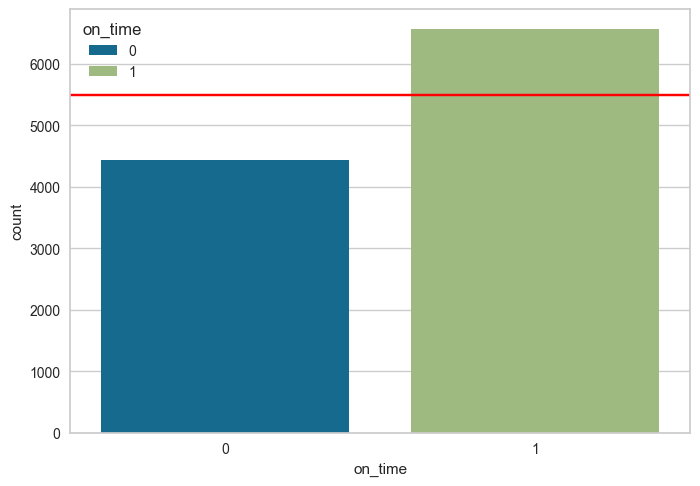

In [25]:
plt.Figure(figsize=(7,7))
plot = sns.countplot(data=df,x='on_time',hue='on_time')
plot.axhline(y=df.shape[0]/2,color='red')
plt.show()

## View data frequency

View histogram of count

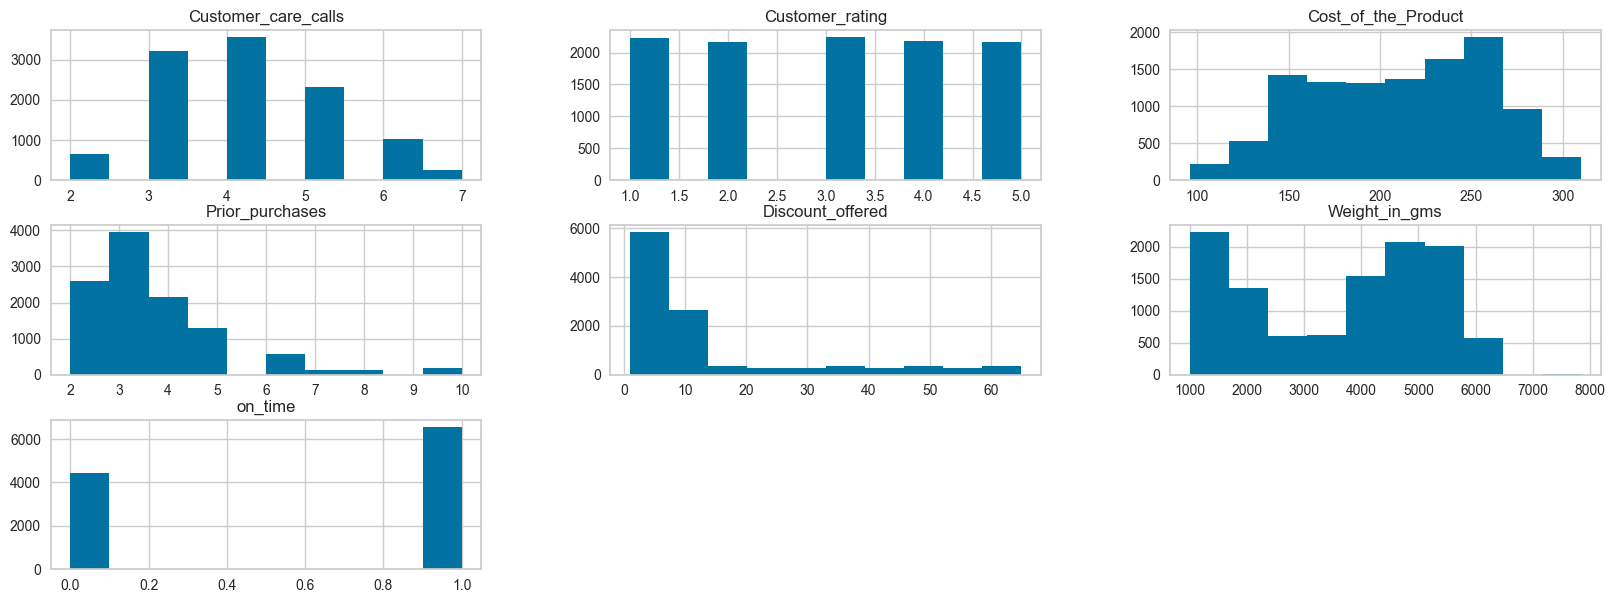

In [26]:
df.select_dtypes(exclude=object).hist(layout=(3,3), figsize=(20,7))
plt.show()

View box graphics os coluns values

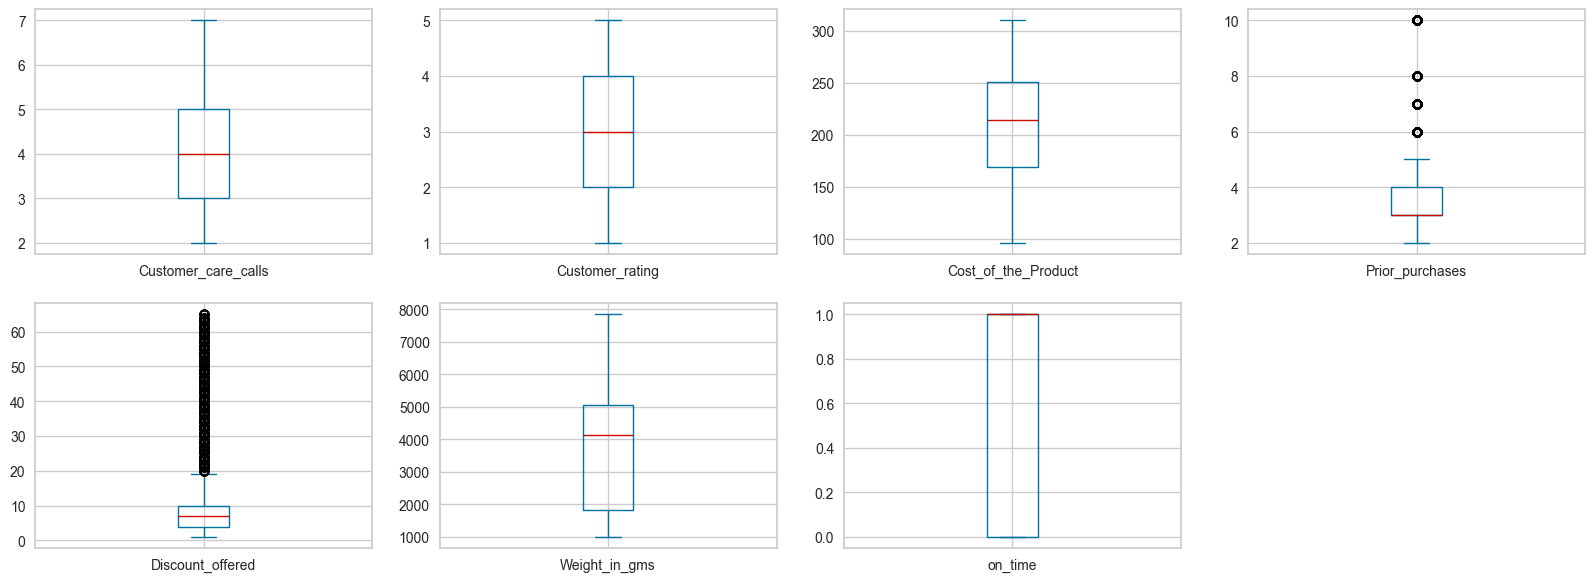

In [27]:
df.select_dtypes(exclude=object).plot(kind='box', subplots=True, layout=(2,4), figsize=(20,7))
plt.show()

## on_time relation visualization

### Numeric Columns

view the relationship  between target column and other numeric coluns

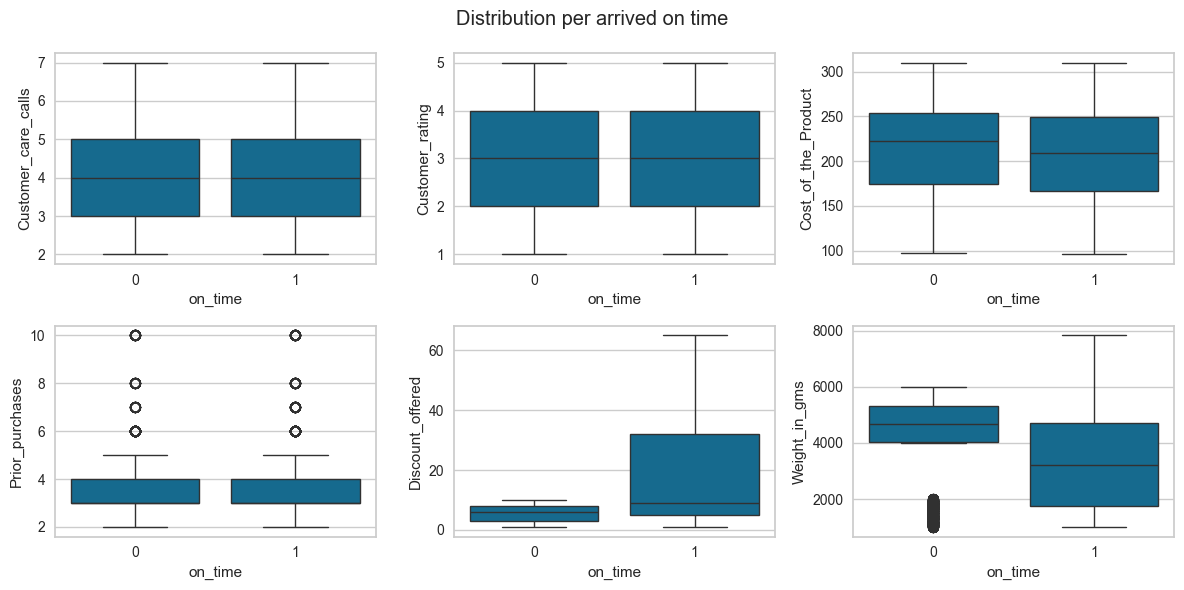

In [32]:
#reaching At the time
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.drop('on_time',axis=1).select_dtypes(exclude=object).columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='on_time', y=col)
plt.suptitle("Distribution per arrived on time")
plt.tight_layout()
plt.show()

### Category columns

Plot the count on each category

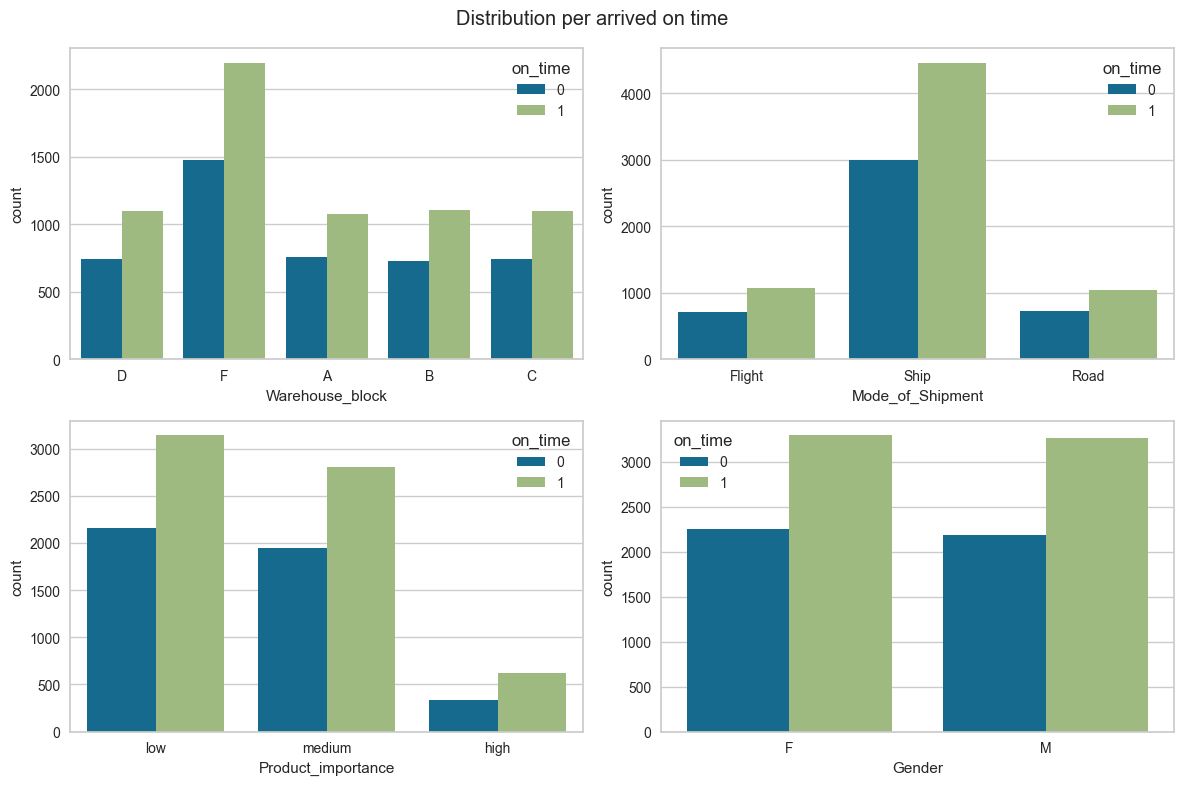

In [33]:
#reaching At the time count category
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.drop('on_time',axis=1).select_dtypes(include=object).columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df,x=col,hue='on_time')
    #sns.barplot(data=df, x='on_time', y=col,estimator=np.count_nonzero)
plt.suptitle("Distribution per arrived on time")
plt.tight_layout()
plt.show()

View the mean of the target on each category.

mean of the values reference to % on this case 

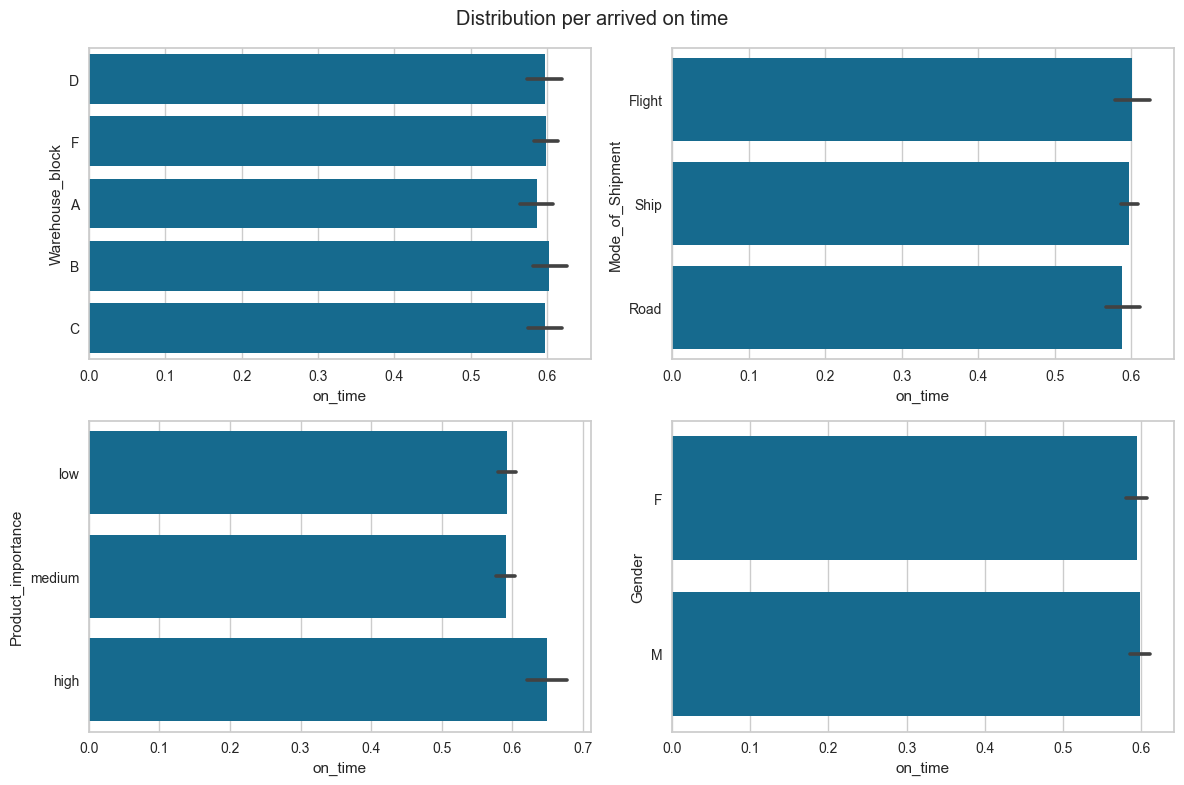

In [34]:
#reaching At the time mean category
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.drop('on_time',axis=1).select_dtypes(include=object).columns):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=df, x='on_time', y=col,estimator=np.mean)
plt.suptitle("Distribution per arrived on time")
plt.tight_layout()
plt.show()

# Outliers
View

In [35]:
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.05)

In [36]:
lof_ind = np.where(lof.fit_predict(df.select_dtypes(exclude=object))==-1)

In [37]:
df['anom'] = 0
df.loc[lof_ind[0],'anom'] = 1

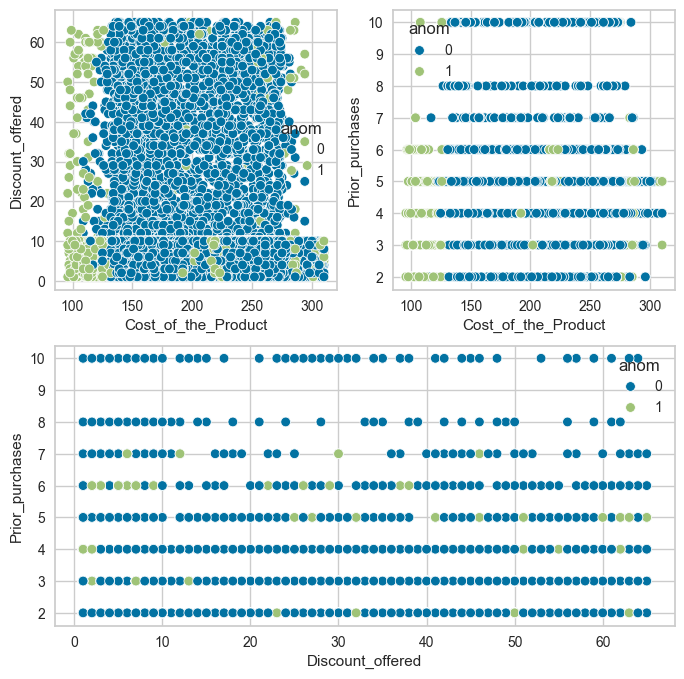

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df,y='Discount_offered',x='Cost_of_the_Product',hue='anom')
plt.subplot(2, 2, 2)
sns.scatterplot(data=df,y='Prior_purchases',x='Cost_of_the_Product',hue='anom')
plt.subplot(2, 2, (3,4))
sns.scatterplot(data=df,y='Prior_purchases',x='Discount_offered',hue='anom')
plt.show()

In [39]:
df.drop(columns=['anom'],inplace=True)

# Treat pt 2
- select numerical columns to scale
- label encoder

Treat the outliers with stardard scale

Treat categorical coluns with labelencoder

In [200]:
for col in df.select_dtypes(include=object).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Multicolumns verification

## Spearman Relation

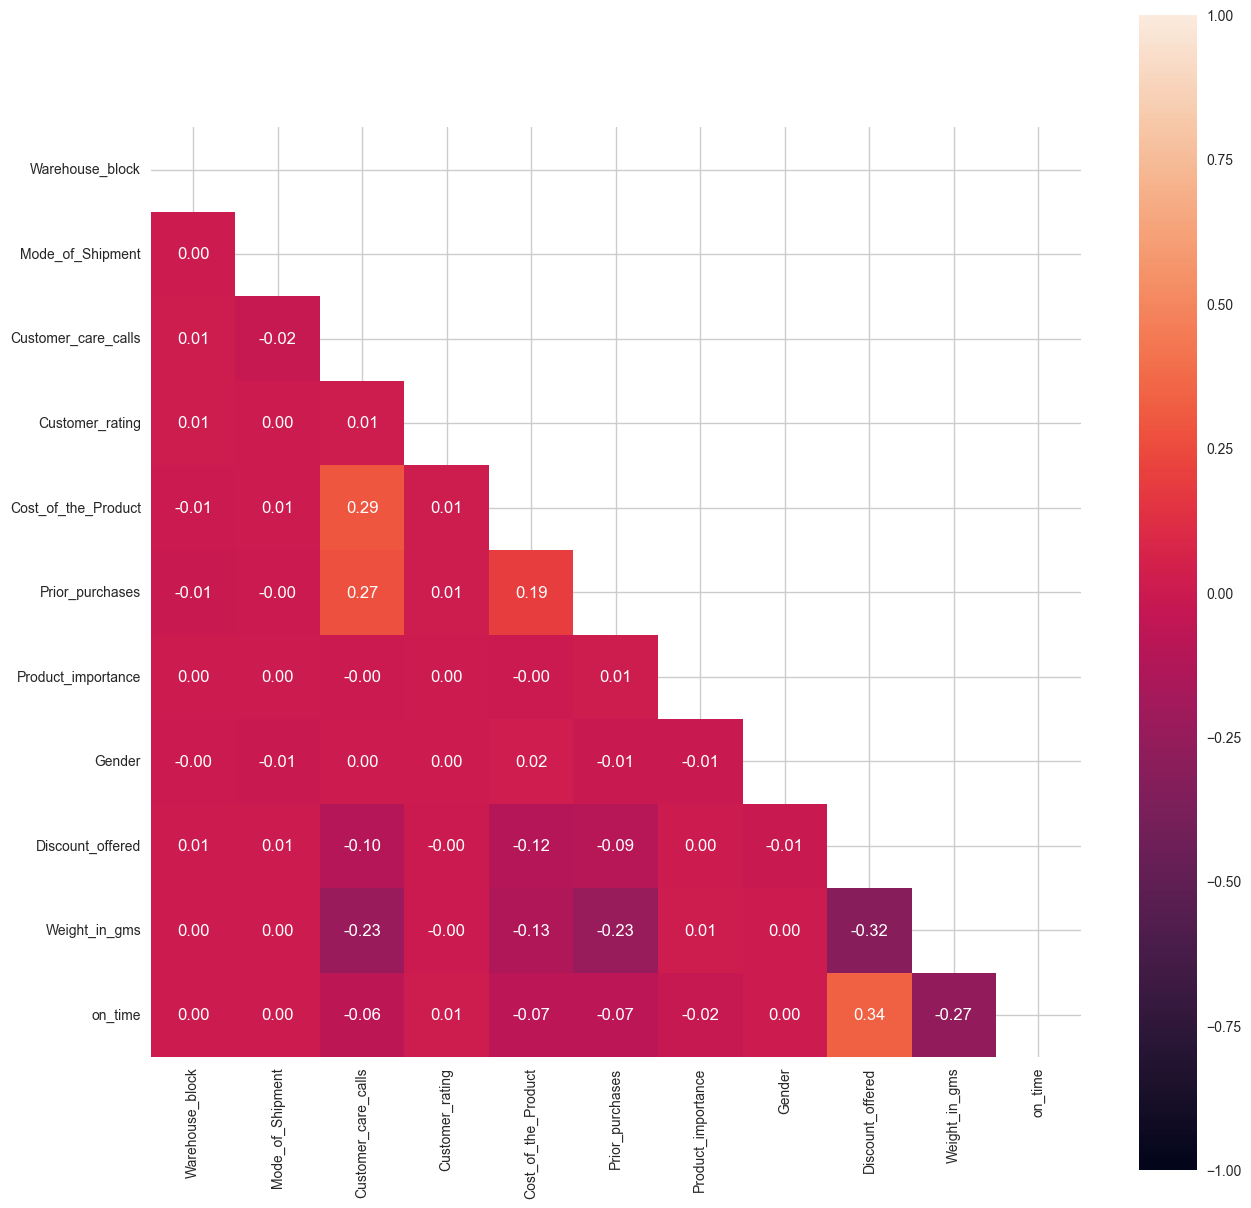

In [43]:
mask = np.triu(np.ones_like(df.select_dtypes(exclude=object).corr(), dtype=np.bool_))
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(exclude=object).corr(method='spearman')
            ,mask=mask,fmt='.2f' ,square = True
            ,annot=True, vmin=-1, vmax=1)
plt.show()

## Multivariable view

All realtions with on_time

<Figure size 1500x1500 with 0 Axes>

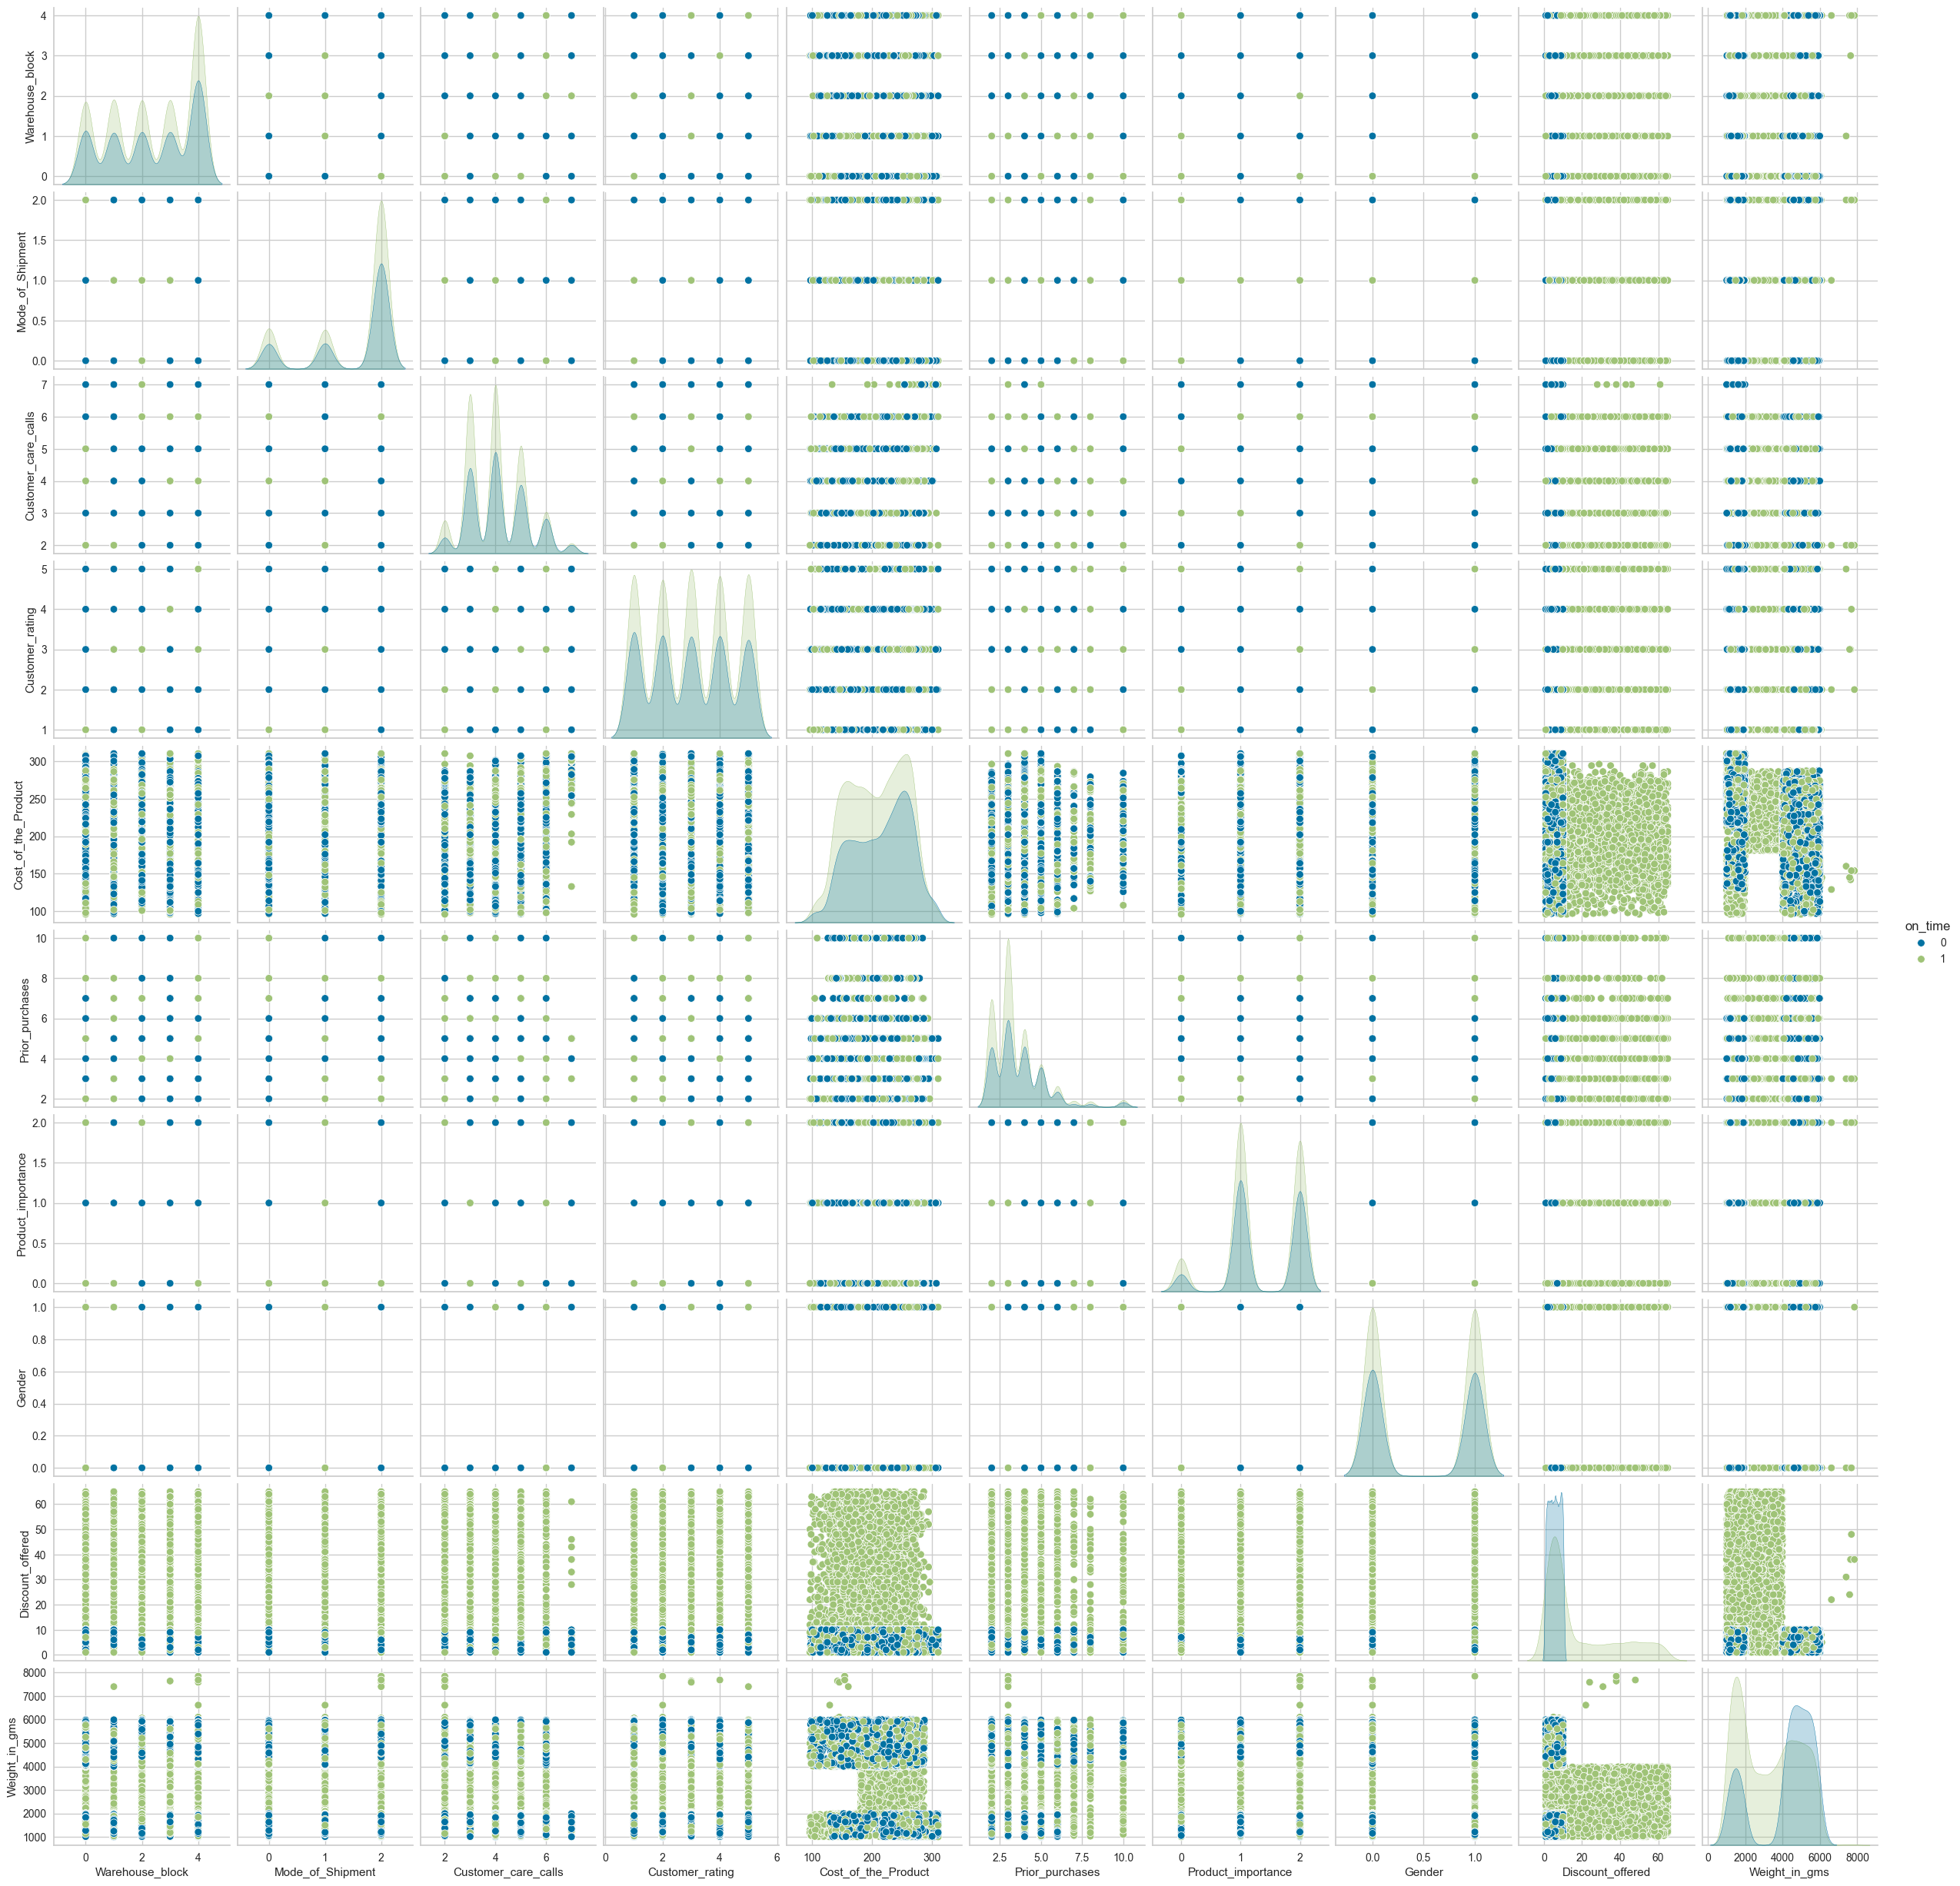

In [44]:
plt.figure(figsize=(15,15))
sns.pairplot(df.select_dtypes(exclude=(object)),hue='on_time')
plt.show()

Some relations that I thought would be good to see with mode details

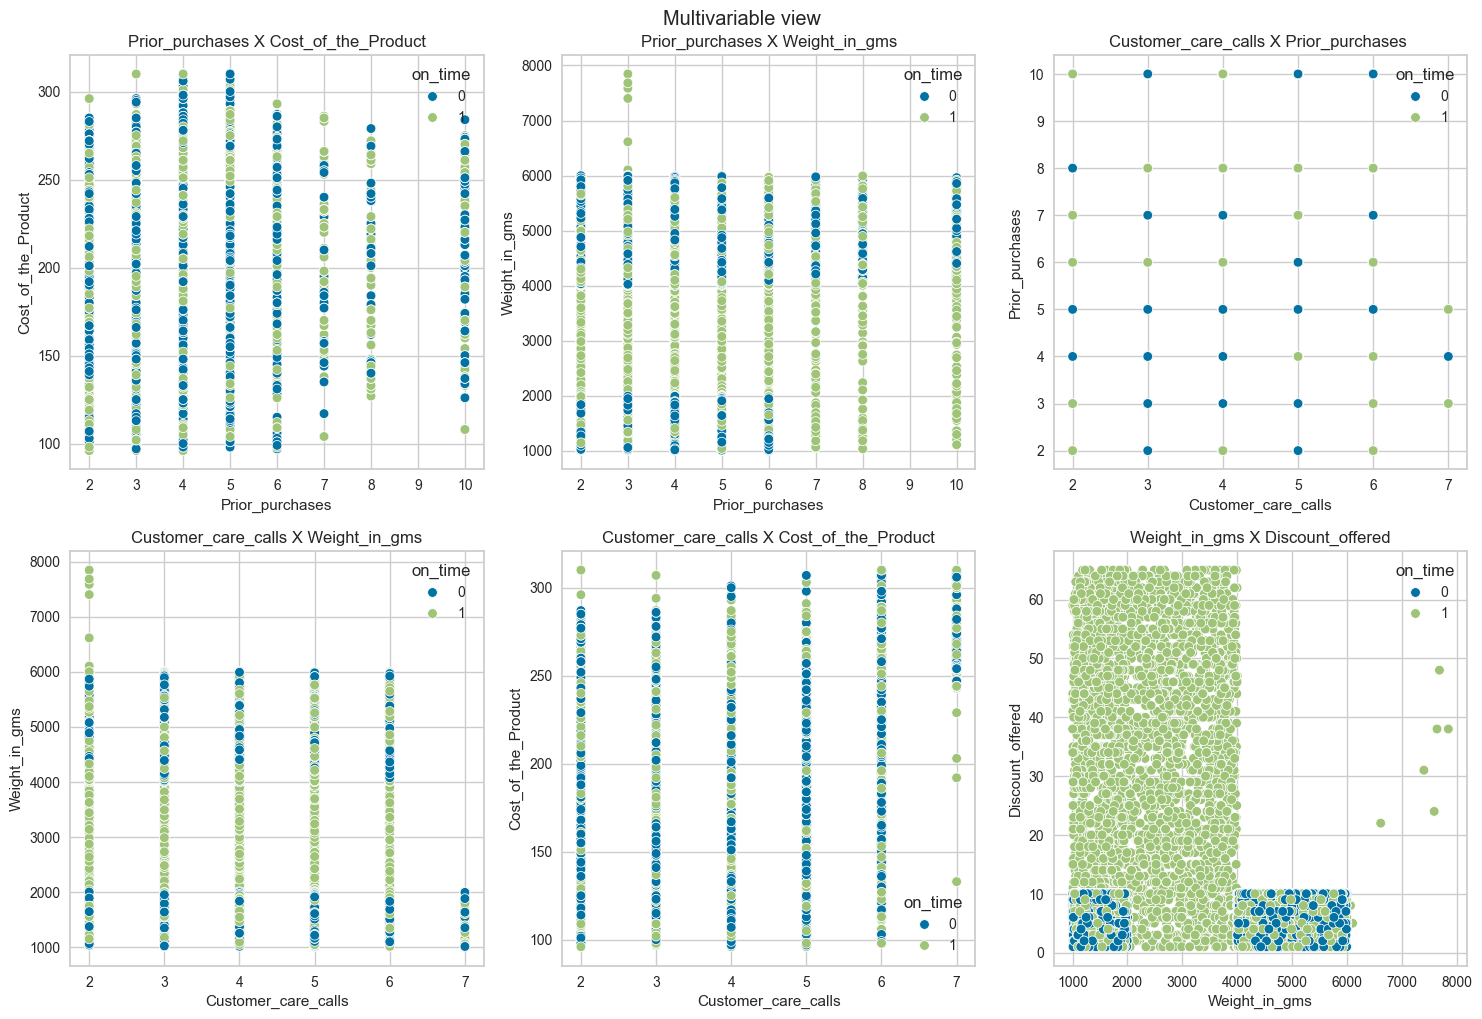

In [45]:
plt.figure(figsize=(15,15))
plt.subplot(3, 3, 1)
sns.scatterplot(data=df,x="Prior_purchases",y="Cost_of_the_Product",hue='on_time')
plt.title("Prior_purchases X Cost_of_the_Product")
plt.subplot(3, 3, 2)
sns.scatterplot(data=df,x="Prior_purchases",y="Weight_in_gms",hue='on_time')
plt.title("Prior_purchases X Weight_in_gms")
plt.subplot(3, 3, 3)
sns.scatterplot(data=df,x="Customer_care_calls",y="Prior_purchases",hue='on_time')
plt.title("Customer_care_calls X Prior_purchases ")
plt.subplot(3, 3, 4)
sns.scatterplot(data=df,x="Customer_care_calls",y="Weight_in_gms",hue='on_time')
plt.title("Customer_care_calls X Weight_in_gms")
plt.subplot(3, 3, 5)
sns.scatterplot(data=df,x="Customer_care_calls",y="Cost_of_the_Product",hue='on_time')
plt.title("Customer_care_calls X Cost_of_the_Product")
plt.subplot(3, 3, 6)
sns.scatterplot(data=df,x="Weight_in_gms",y="Discount_offered",hue='on_time')
plt.title("Weight_in_gms X Discount_offered")
#
plt.suptitle("Multivariable view")
plt.tight_layout()
plt.show()

## VIF
 - *No treat on columns*

In [46]:
df_vif = df.drop(columns='on_time')
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns 
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
vif_data

,Feature,VIF
0,Warehouse_block,3.350684
1,Mode_of_Shipment,4.733955
2,Customer_care_calls,14.182232
3,Customer_rating,5.173562
4,Cost_of_the_Product,18.247517
5,Prior_purchases,6.399117
6,Product_importance,5.211311
7,Gender,1.957789
8,Discount_offered,1.735545
9,Weight_in_gms,5.324983


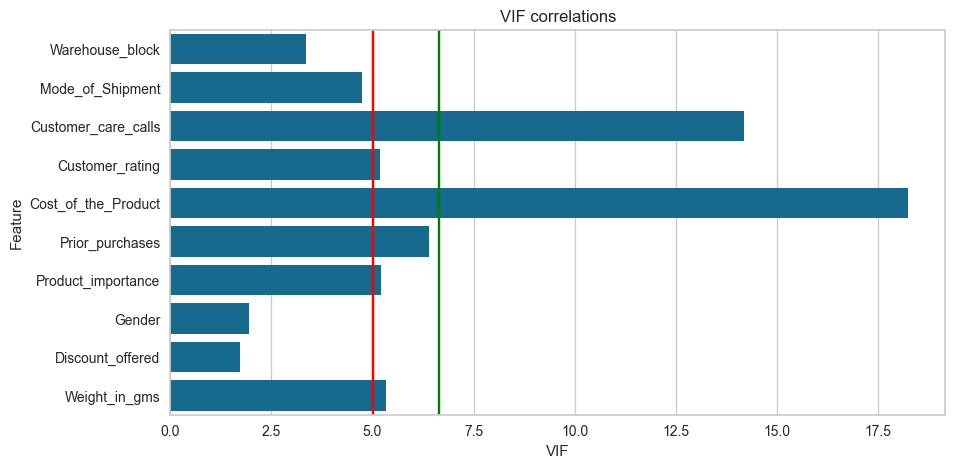

In [47]:
plt.figure(figsize=(10,5))
plot = sns.barplot(data=vif_data,y='Feature',x='VIF',orient='h')
plot.axvline(x=5,color='red')
plot.axvline(x=vif_data['VIF'].mean(),color='green')
plt.title("VIF correlations")
plt.show()

# Treat pt 3 
- StandardScaler
- New features

## New features

In [272]:
df.insert(0,allow_duplicates=False,column='effective_cost',value = df['Cost_of_the_Product']* (1 - df['Discount_offered']/100))
df.insert(0,allow_duplicates=False,column='transport',value = pd.cut(df['Weight_in_gms'],right=False,bins=range(0,10000,2000),labels=range(0,4)))
df.insert(0,allow_duplicates=False,column='good_disc',value = pd.cut(df['Discount_offered'],right=False,bins=[0,10,100],labels=[0,1]))

## Spearman Relation

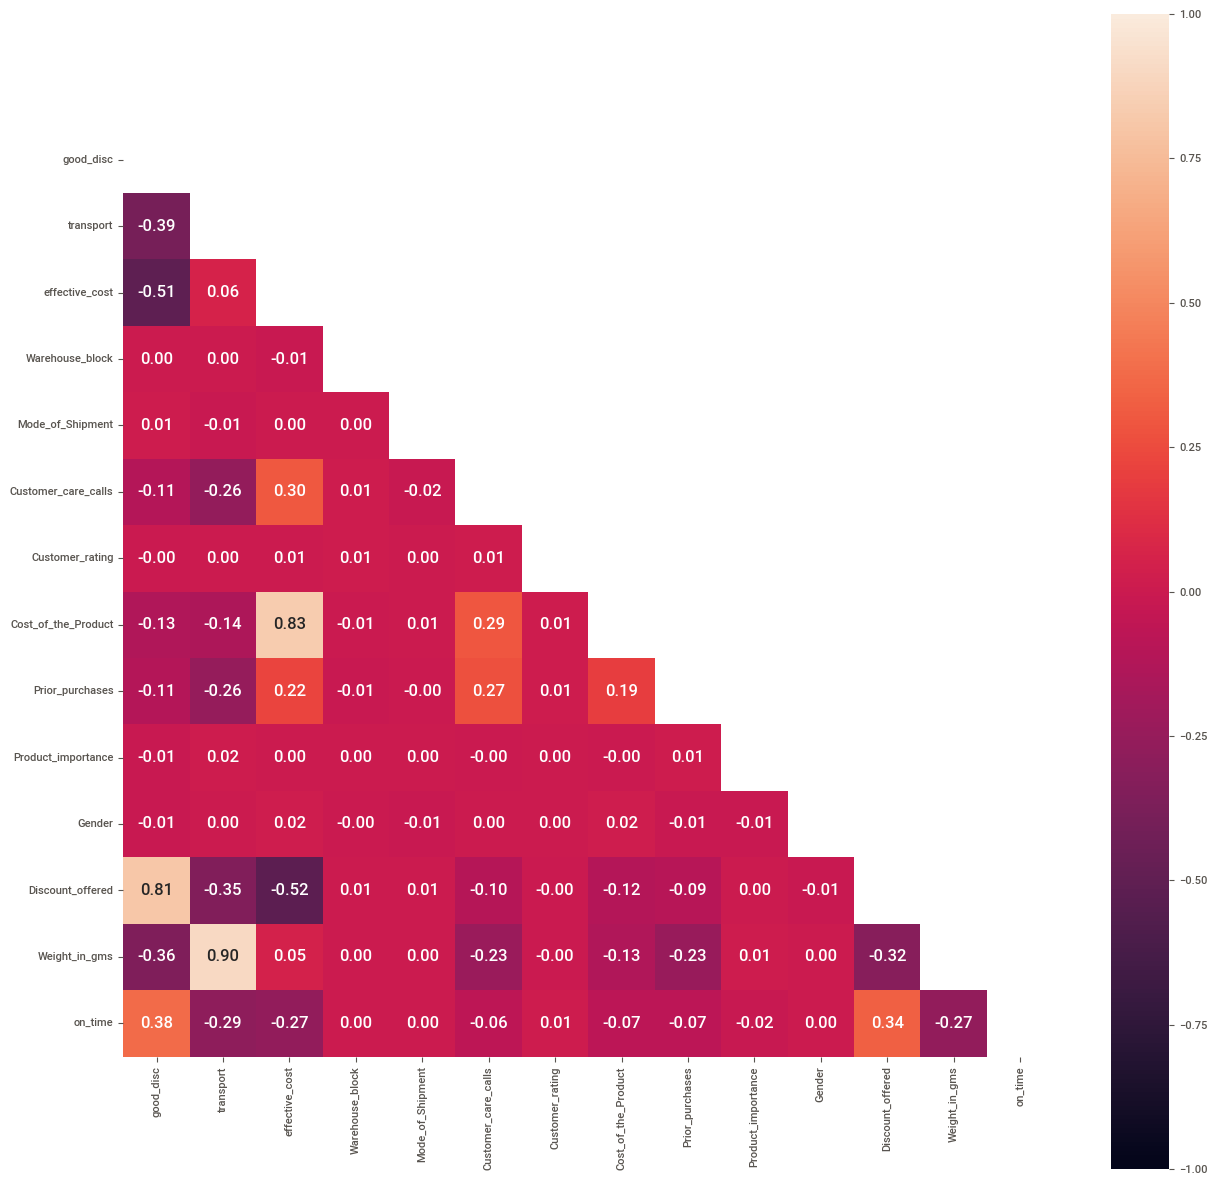

In [273]:
mask = np.triu(np.ones_like(df.select_dtypes(exclude=object).corr(), dtype=np.bool_))
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(exclude=object).corr(method='spearman'), mask=mask,fmt='.2f', square = True, annot=True, vmin=-1, vmax=1)
plt.show()

## Columns 

In [9]:
cols_model = ['transport', 
              'good_disc', 
              'effective_cost',
              'Warehouse_block', 
              'Mode_of_Shipment',
              #'Customer_care_calls',
              #'Cost_of_the_Product','Gendder,
              'Prior_purchases', 
              'Product_importance'
              ,'Discount_offered'
              #,'Weight_in_gms'
       ]

## VIF after features

In [10]:
df_vif = df[cols_model]
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns 
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
vif_data

,Feature,VIF
0,transport,3.098094
1,good_disc,3.203416
2,effective_cost,1.954329
3,Warehouse_block,3.101051
4,Mode_of_Shipment,4.176865
5,Prior_purchases,4.642797
6,Product_importance,4.508913
7,Discount_offered,3.303627


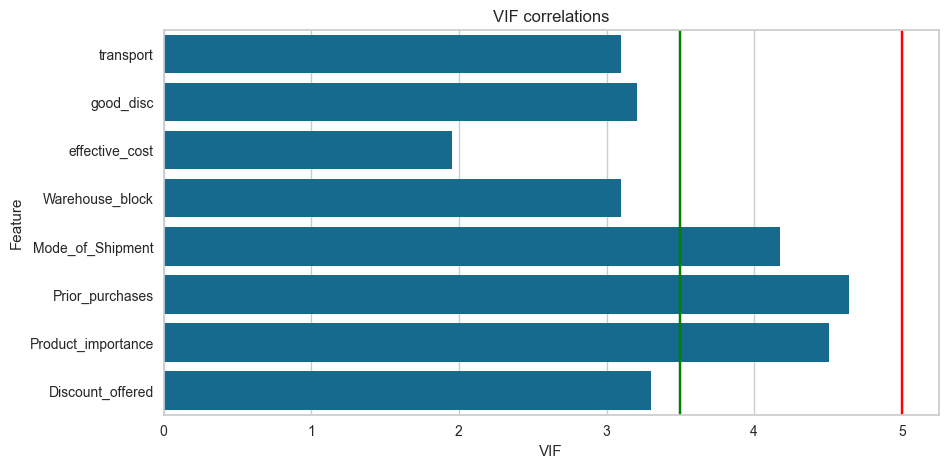

In [11]:
plt.figure(figsize=(10,5))
plot = sns.barplot(data=vif_data,y='Feature',x='VIF',orient='h')
plot.axvline(x=5,color='red')
plot.axvline(x=vif_data['VIF'].mean(),color='green')
plt.title("VIF correlations")
plt.show()

### StandardScaler

In [12]:
col_scale = df.drop(columns=['on_time']).select_dtypes(exclude=object).columns
scale_index = np.where((df[col_scale].max() - df[col_scale].min()) > 10)
col_scale = col_scale[scale_index]

In [13]:
for col in col_scale:
    df[col] = StandardScaler().fit_transform(df[[col]])

# Base to train

## Save df treated

In [ ]:
joblib.dump(df,filename='./pkl/df_treat.pkl')

['df_treat.pkl']

## load data

In [ ]:
df = joblib.load('./pkl/df_treat.pkl')

## Split base

In [12]:
k = KFold(n_splits=5,random_state=42,shuffle=True)

In [14]:
cols_model = ['transport', 
              'good_disc', 
              'effective_cost',
              'Warehouse_block', 
              'Mode_of_Shipment',
              #'Customer_care_calls',
              #'Cost_of_the_Product','Gendder,
              'Prior_purchases', 
              'Product_importance'
              ,'Discount_offered'
              #,'Weight_in_gms'
       ]

creat base to test and train

In [15]:
ok = df[df['on_time']==1].index.to_list()
n_ok = df[df['on_time']==0].index.to_list()

In [16]:
lst_index = ok[0:len(n_ok)] + n_ok


In [17]:
X = df.loc[lst_index,cols_model].values
Y = df.loc[lst_index,'on_time'].values

In [ ]:
joblib.dump((X,Y),"./pkl/X_Y.pkl")

['X_Y.pkl']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.10)
#cross_val = cross_val_score(X=X,y=Y,cv=k)

In [ ]:
joblib.dump((x_train,x_test,y_train,y_test),"./pkl/train_test.pkl")

['train_test.pkl']

# Model training

## Bayes

In [308]:
bayes = GaussianNB()
bayes.fit(X=x_train,y=y_train)
pred = bayes.predict(X=x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=pred))



Accuracy
0.7713963963963963
Classification
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       420
           1       0.89      0.65      0.75       468

    accuracy                           0.77       888
   macro avg       0.79      0.78      0.77       888
weighted avg       0.80      0.77      0.77       888

mean abs error
0.2286036036036036
mean sqd error
0.2286036036036036
R²
0.08290598290598283


0.7713963963963963

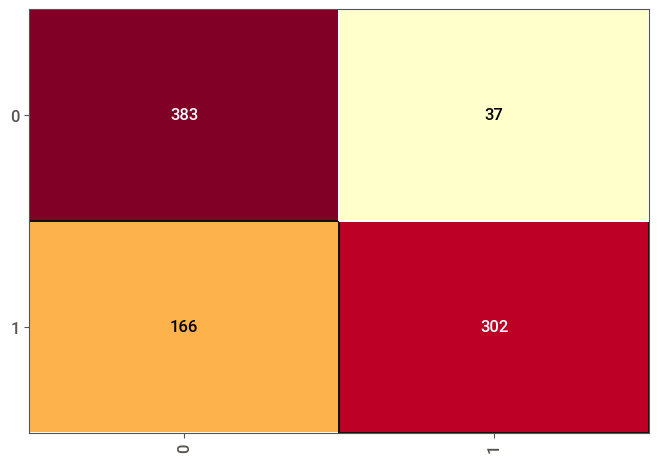

In [309]:
cm = ConfusionMatrix(bayes)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

In [ ]:
joblib.dump(bayes,filename='./pkl/bayes_model.pkl')

['bayes_model.pkl']

## Linear regression

In [310]:
param = {'tol': [0.01, 0.001, 0.0001],
        'C': [1.0, 1.5, 2.0],
        'solver': ['lbfgs', 'sag', 'saga']}
test_grid = GridSearchCV(LogisticRegression(),param_grid=param)
test_grid.fit(X=x_train,y=y_train)
grid_pred = test_grid.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=grid_pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=grid_pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=grid_pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=grid_pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=grid_pred))
print("Best parameters")
print(test_grid.best_params_)


Accuracy
0.7804054054054054
Classification
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       420
           1       0.89      0.67      0.76       468

    accuracy                           0.78       888
   macro avg       0.80      0.79      0.78       888
weighted avg       0.80      0.78      0.78       888

mean abs error
0.2195945945945946
mean sqd error
0.2195945945945946
R²
0.11904761904761896
Best parameters
{'C': 1.0, 'solver': 'saga', 'tol': 0.01}


In [311]:
linear_model = LogisticRegression(**test_grid.best_params_)

In [312]:
cross_val = cross_val_score(LogisticRegression(),X,Y,cv=k)
print(f"r²=\n\t{cross_val}\n mean r²:\n\t{np.mean(cross_val)}\n desv r²:\n\t{np.std(cross_val)}")

r²=
	[0.79774648 0.78028169 0.77903044 0.7886133  0.7897407 ]
 mean r²:
	0.787082522190641
 desv r²:
	0.006844216769937233


In [313]:
linear_model.fit(X=x_train,y=y_train)
pred = linear_model.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=pred))

Accuracy
0.7792792792792793
Classification
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       420
           1       0.90      0.65      0.76       468

    accuracy                           0.78       888
   macro avg       0.80      0.79      0.78       888
weighted avg       0.81      0.78      0.78       888

mean abs error
0.22072072072072071
mean sqd error
0.22072072072072071
R²
0.11452991452991446


0.7792792792792793

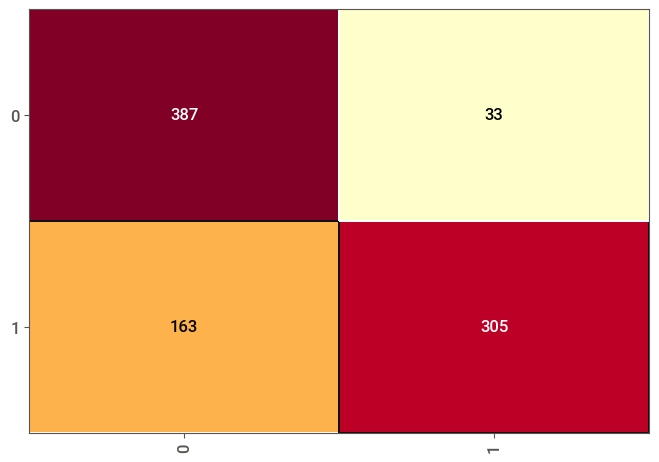

In [314]:
cm = ConfusionMatrix(linear_model)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

In [ ]:
joblib.dump(linear_model,filename='./pkl/linear_reg_model.pkl')

['linear_reg_model.pkl']

## KNN 

In [320]:
param = {
    'n_neighbors':[100,50,20,10],
    'weights':['uniform','distance'],
    'algorithm':['auto'],
    'p':[1,2]
    #metric='minkowski',
}
test_grid = GridSearchCV(KNeighborsClassifier(),param_grid=param)
test_grid.fit(x_train,y=y_train)
grid_pred = test_grid.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=grid_pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=grid_pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=grid_pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=grid_pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=grid_pred))
print("Best parameters")
print(test_grid.best_params_)



Accuracy
0.8288288288288288
Classification
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       420
           1       0.99      0.68      0.81       468

    accuracy                           0.83       888
   macro avg       0.86      0.84      0.83       888
weighted avg       0.87      0.83      0.83       888

mean abs error
0.17117117117117117
mean sqd error
0.17117117117117117
R²
0.3133089133089132
Best parameters
{'algorithm': 'auto', 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


In [321]:
knn_model = KNeighborsClassifier(**test_grid.best_params_)
cross_val = cross_val_score(knn_model,X,Y,cv=k)
print(f"r²=\n\t{cross_val}\n mean r²:\n\t{np.mean(cross_val)}\n desv r²:\n\t{np.std(cross_val)}")

r²=
	[0.84450704 0.82366197 0.81905299 0.83652762 0.83258174]
 mean r²:
	0.8312662718135192
 desv r²:
	0.009074358767660344


In [322]:
knn_model = KNeighborsClassifier(**test_grid.best_params_)

In [323]:
knn_model.fit(X=x_train,y=y_train)
pred = knn_model.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=pred))

Accuracy
0.8288288288288288
Classification
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       420
           1       0.99      0.68      0.81       468

    accuracy                           0.83       888
   macro avg       0.86      0.84      0.83       888
weighted avg       0.87      0.83      0.83       888

mean abs error
0.17117117117117117
mean sqd error
0.17117117117117117
R²
0.3133089133089132


0.8288288288288288

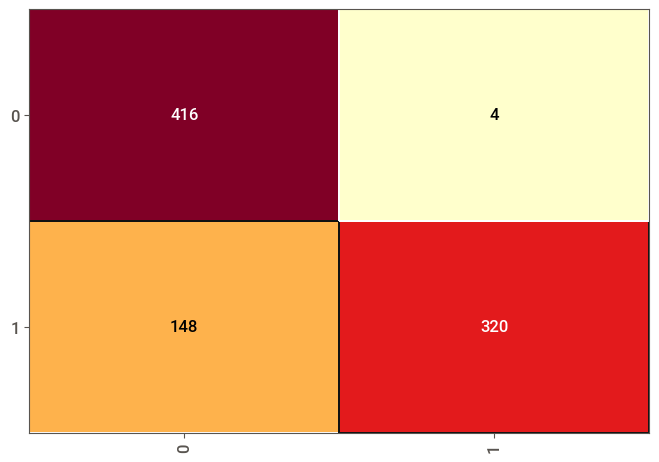

In [324]:
cm = ConfusionMatrix(knn_model)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

In [ ]:
joblib.dump(knn_model,filename='./pkl/knn_model.pkl')

['knn_model.pkl']

## Decision Tree

In [325]:
param = {
    'criterion':["gini", "entropy"],
    'splitter': ['best', 'random'],
    'min_samples_split':[2,5,15],
    'min_samples_leaf': [1,5,10],
    'random_state':[42]
}
test_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param)
test_grid.fit(X=x_train,y=y_train)
grid_pred = test_grid.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=grid_pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=grid_pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=grid_pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=grid_pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=grid_pred))
print("Best parameters")
print(test_grid.best_params_)



Accuracy
0.831081081081081
Classification
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       420
           1       0.94      0.72      0.82       468

    accuracy                           0.83       888
   macro avg       0.85      0.84      0.83       888
weighted avg       0.85      0.83      0.83       888

mean abs error
0.16891891891891891
mean sqd error
0.16891891891891891
R²
0.3223443223443223
Best parameters
{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}


In [326]:
tree_model = DecisionTreeClassifier(**test_grid.best_params_)

In [327]:
cross_val = cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)
print(f"r²=\n\t{cross_val}\n mean r²:\n\t{np.mean(cross_val)}\n desv r²:\n\t{np.std(cross_val)}")

r²=
	[0.77746479 0.77239437 0.75930101 0.76662909 0.76493799]
 mean r²:
	0.7681454499261635
 desv r²:
	0.006256429269677034


In [328]:
tree_model.fit(X=x_train,y=y_train)
pred = tree_model.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=pred))

Accuracy
0.831081081081081
Classification


              precision    recall  f1-score   support

           0       0.75      0.95      0.84       420
           1       0.94      0.72      0.82       468

    accuracy                           0.83       888
   macro avg       0.85      0.84      0.83       888
weighted avg       0.85      0.83      0.83       888

mean abs error
0.16891891891891891
mean sqd error
0.16891891891891891
R²
0.3223443223443223


0.831081081081081

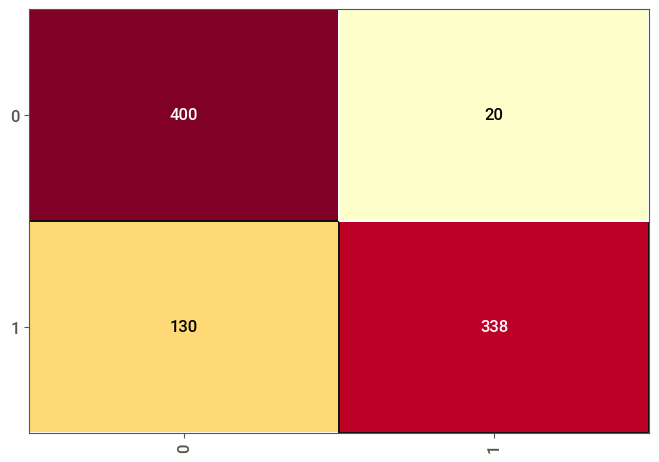

In [329]:
cm = ConfusionMatrix(tree_model)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

In [ ]:
joblib.dump(tree_model,filename='./pkl/dec_tree_model.pkl')

['dec_tree_model.pkl']

## Random Forest

In [330]:
param = {
    'criterion':["gini", "entropy"],
    'n_estimators':[50,100,200],
    'min_samples_split':[2,5,10],
    'min_samples_leaf': [1,5,10],
    'random_state':[42]
}
test_grid = GridSearchCV(RandomForestClassifier(),param_grid=param)
test_grid.fit(X=x_train,y=y_train)
grid_pred = test_grid.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=grid_pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=grid_pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=grid_pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=grid_pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=grid_pred))
print("Best parameters")
print(test_grid.best_params_)

Accuracy
0.8412162162162162
Classification
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       420
           1       0.99      0.71      0.82       468

    accuracy                           0.84       888
   macro avg       0.87      0.85      0.84       888
weighted avg       0.88      0.84      0.84       888

mean abs error
0.15878378378378377
mean sqd error
0.15878378378378377
R²
0.36300366300366294
Best parameters
{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}


In [331]:
rf_model = RandomForestClassifier(**test_grid.best_params_)

In [332]:
cross_val = cross_val_score(rf_model,X,Y,cv=k)
print(f"r²=\n\t{cross_val}\n mean r²:\n\t{np.mean(cross_val)}\n desv r²:\n\t{np.std(cross_val)}")

r²=
	[0.85915493 0.84394366 0.82919955 0.85005637 0.84949267]
 mean r²:
	0.8463694364609301
 desv r²:
	0.009874272907078164


In [333]:
rf_model.fit(X=x_train,y=y_train)
pred = rf_model.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=pred))

Accuracy
0.8412162162162162
Classification
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       420
           1       0.99      0.71      0.82       468

    accuracy                           0.84       888
   macro avg       0.87      0.85      0.84       888
weighted avg       0.88      0.84      0.84       888

mean abs error
0.15878378378378377
mean sqd error
0.15878378378378377
R²
0.36300366300366294


0.8412162162162162

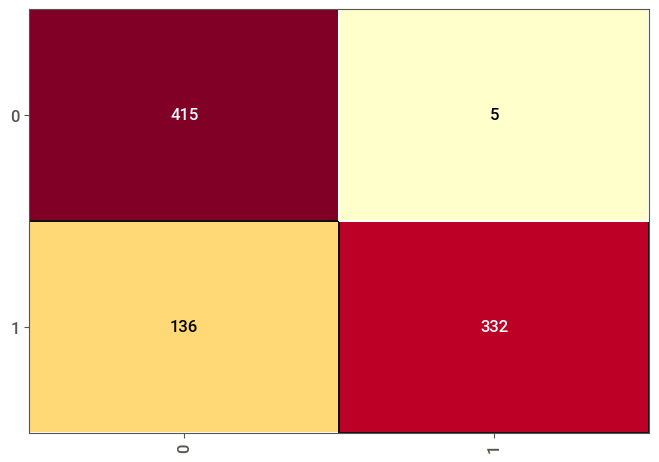

In [334]:
cm = ConfusionMatrix(rf_model)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

In [ ]:
joblib.dump(rf_model,filename='./pkl/rf_model.pkl')

['rf_model.pkl']

## SVM

In [345]:
param = {'tol': [0.1, 0.01, 0.001],
         'C': [1.0,2.0],
         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
         'random_state':[42]
         }
test_grid = GridSearchCV(SVC(),param_grid=param)
test_grid.fit(X=x_train,y=y_train)
grid_pred = test_grid.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=grid_pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=grid_pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=grid_pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=grid_pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=grid_pred))
print("Best parameters")
print(test_grid.best_params_)

Accuracy
0.8412162162162162
Classification
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       420
           1       0.99      0.71      0.82       468

    accuracy                           0.84       888
   macro avg       0.87      0.85      0.84       888
weighted avg       0.88      0.84      0.84       888

mean abs error
0.15878378378378377
mean sqd error
0.15878378378378377
R²
0.36300366300366294
Best parameters
{'C': 2.0, 'kernel': 'rbf', 'random_state': 42, 'tol': 0.01}


In [346]:
svc_model = SVC(**test_grid.best_params_)

In [347]:
cross_val = cross_val_score(svc_model,X,Y,cv=k)
print(f"r²=\n\t{cross_val}\n mean r²:\n\t{np.mean(cross_val)}\n desv r²:\n\t{np.std(cross_val)}")

r²=
	[0.85464789 0.8428169  0.82976325 0.85005637 0.85005637]
 mean r²:
	0.845468155040729
 desv r²:
	0.008718304874540717


In [33]:
svc_model.fit(X=x_train,y=y_train)
pred = svc_model.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=pred))

Accuracy
0.8603603603603603
Classification
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       436
           1       0.99      0.74      0.84       452

    accuracy                           0.86       888
   macro avg       0.88      0.86      0.86       888
weighted avg       0.89      0.86      0.86       888

mean abs error
0.13963963963963963
mean sqd error
0.13963963963963963
R²
0.4412600470893886


0.8603603603603603

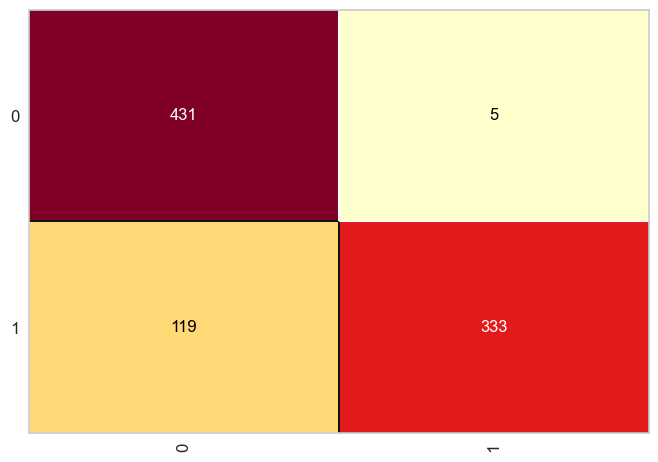

In [34]:
cm = ConfusionMatrix(svc_model)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

In [ ]:
joblib.dump(svc_model,filename='./pkl/svc_model.pkl')

['svc_model.pkl']

## Neural Network

In [ ]:
param = {
    'hidden_layer_sizes':[(100),(10,10),(8,32,8)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'max_iter':[200],
    'verbose':[False],
    'tol':[0.0000010],
    'random_state': [42],
    'learning_rate':["constant", "invscaling", "adaptive"]
    ,'batch_size': ['auto']
}
test_grid = GridSearchCV(MLPClassifier(),param_grid=param,n_jobs=-1)
test_grid.fit(X=x_train,y=y_train)
grid_pred = test_grid.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=grid_pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=grid_pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=grid_pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=grid_pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=grid_pred))
print("Best parameters")
print(test_grid.best_params_)

Accuracy
0.8637387387387387
Classification
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       436
           1       0.99      0.74      0.85       452

    accuracy                           0.86       888
   macro avg       0.89      0.87      0.86       888
weighted avg       0.89      0.86      0.86       888

mean abs error
0.13626126126126126
mean sqd error
0.13626126126126126
R²
0.4547779491759356
Best parameters
{'activation': 'relu', 'batch_size': 'auto', 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'random_state': 42, 'solver': 'adam', 'tol': 1e-06, 'verbose': False}


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
nn_model = MLPClassifier(**test_grid.best_params_)

In [13]:
cross_val = cross_val_score(nn_model,X,Y,cv=k)
print(f"r²=\n\t{cross_val}\n mean r²:\n\t{np.mean(cross_val)}\n desv r²:\n\t{np.std(cross_val)}")

C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


r²=
	[0.85183099 0.84225352 0.82863585 0.85005637 0.84723788]
 mean r²:
	0.8440029217015736
 desv r²:
	0.008337805947826288


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
nn_model.fit(X=x_train,y=y_train)
pred = nn_model.predict(x_test)
print("Accuracy")
print(accuracy_score(y_true=y_test,y_pred=pred))
print("Classification")
print(classification_report(y_true=y_test,y_pred=pred))
print("mean abs error")
print(mean_absolute_error(y_true=y_test,y_pred=pred))
print("mean sqd error")
print(mean_squared_error(y_true=y_test,y_pred=pred))
print("R²")
print(r2_score(y_true=y_test,y_pred=pred))

Accuracy
0.8637387387387387
Classification
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       436
           1       0.99      0.74      0.85       452

    accuracy                           0.86       888
   macro avg       0.89      0.87      0.86       888
weighted avg       0.89      0.86      0.86       888

mean abs error
0.13626126126126126
mean sqd error
0.13626126126126126
R²
0.4547779491759356


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8637387387387387

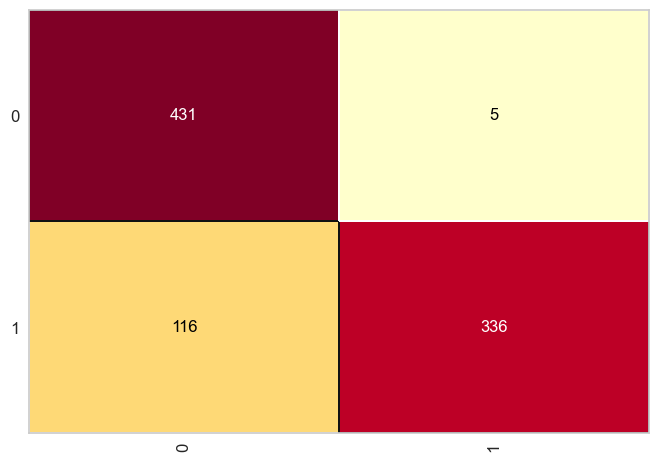

In [ ]:
cm = ConfusionMatrix(nn_model)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

In [ ]:
joblib.dump(nn_model,filename='./pkl/nn_model.pkl')

['nn_model.pkl']

# Testes

## Load Models

In [ ]:
bayes_model = joblib.load('./pkl/bayes_model.pkl')
tree_model = joblib.load('./pkl/dec_tree_model.pkl')
knn_model = joblib.load('./pkl/knn_model.pkl')
rf_model = joblib.load('./pkl/rf_model.pkl')
linear_model = joblib.load('./pkl/linear_reg_model.pkl')
svc_model = joblib.load('./pkl/svc_model.pkl')
nn_model = joblib.load('./pkl/nn_model.pkl')


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator

In [ ]:
X, Y = joblib.load('./pkl/X_Y.pkl')
x_train, x_test, y_train, y_test = joblib.load('./pkl/train_test.pkl')

## Cross validations

In [28]:
tree_results = []
random_forest_results = []
knn_results = []
linear_result = []
svm_result = []
nn_results = []
bayes_result = []

for i in range(30):
  print(f'Teste: {i}')
  # Tree model
  kfold = KFold(n_splits=5, shuffle=True, random_state=i)
  # bayes
  print(f'-- Bayes')
  scores = cross_val_score(bayes_model, X, Y, cv = kfold)
  bayes_result.append(scores.mean())
  # decision tree
  print(f'-- Trees')
  scores = cross_val_score(tree_model, X, Y, cv = kfold)
  tree_results.append(scores.mean())
  # random forest
  print(f'-- Random Rorest')
  scores = cross_val_score(rf_model,  X, Y, cv = kfold)
  random_forest_results.append(scores.mean())
  #KNN
  print(f'-- KNN')
  scores = cross_val_score(knn_model, X, Y, cv = kfold)
  knn_results.append(scores.mean())
  #Linear regression
  print(f'-- Linear regression')
  scores = cross_val_score(linear_model, X, Y, cv = kfold)
  linear_result.append(scores.mean())
  #SVC
  print(f'-- svc')
  scores = cross_val_score(svc_model, X, Y, cv = kfold)
  svm_result.append(scores.mean())
  # Neural Network
  print(f'-- Neural Network')
  scores = cross_val_score(nn_model, X, Y, cv = kfold)
  nn_results.append(scores.mean())

Teste: 0
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 1
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 2
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 3
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 4
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Teste: 5
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 6
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Teste: 7
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 8
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 9
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 10
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 11
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 12
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 13
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 14
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Teste: 15
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 16
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Teste: 17
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 18
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 19
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Teste: 20
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Teste: 21
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 22
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 23
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 24
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 25
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 26
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 27
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Teste: 28
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Teste: 29
-- Bayes
-- Trees
-- Random Rorest
-- KNN
-- Linear regression
-- svc
-- Neural Network


C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ThalesFerreira\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
df_resultados = pd.DataFrame(
    {"bayes":bayes_result,'linear':linear_result,'knn':knn_results,
     "tree":tree_results,'random_forest':random_forest_results,
     'svc':svm_result,'neural_net':nn_results}
)

In [30]:
joblib.dump(df_resultados,filename='df_results.pkl')

['df_results.pkl']

## Statistical Test

In [37]:
df_resultados.mean()

bayes            0.766761
linear           0.788721
knn              0.831117
tree             0.833934
random_forest    0.846660
svc              0.845638
neural_net       0.844210
dtype: float64

In [91]:
df_resultados.std()

bayes            0.000170
linear           0.000809
knn              0.000781
tree             0.002340
random_forest    0.000450
svc              0.000205
neural_net       0.000485
dtype: float64

### Shapiro

In [61]:
for col in df_resultados.columns:
    print(shapiro(df_resultados[col]))

ShapiroResult(statistic=np.float64(0.9428308320517239), pvalue=np.float64(0.10842600092552829))
ShapiroResult(statistic=np.float64(0.958842646295605), pvalue=np.float64(0.28928784404866514))
ShapiroResult(statistic=np.float64(0.9817636637271815), pvalue=np.float64(0.8702608042442374))
ShapiroResult(statistic=np.float64(0.9693575036013388), pvalue=np.float64(0.5217474528397927))
ShapiroResult(statistic=np.float64(0.9784638643703881), pvalue=np.float64(0.7834009057822708))
ShapiroResult(statistic=np.float64(0.9427677444389647), pvalue=np.float64(0.10800219793792448))
ShapiroResult(statistic=np.float64(0.9704187344533626), pvalue=np.float64(0.5506958651692518))


### normality

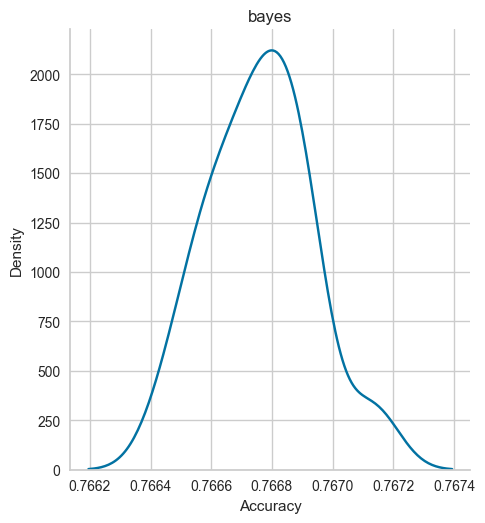

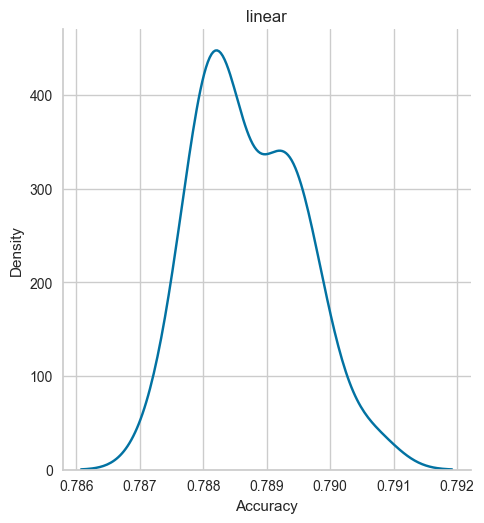

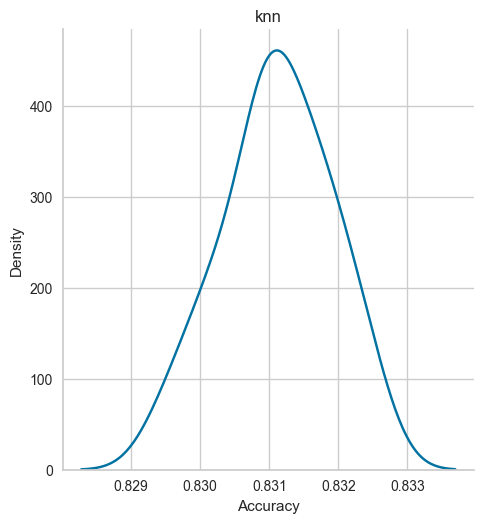

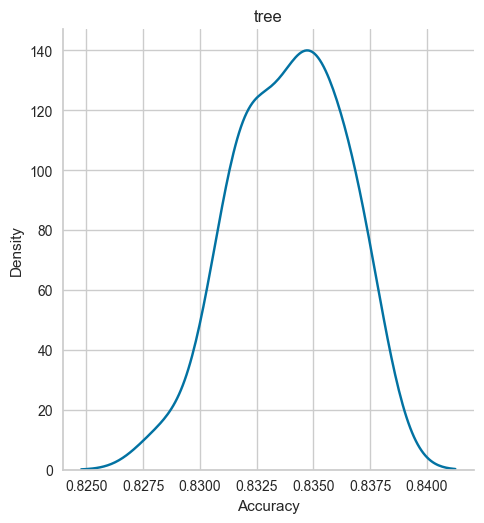

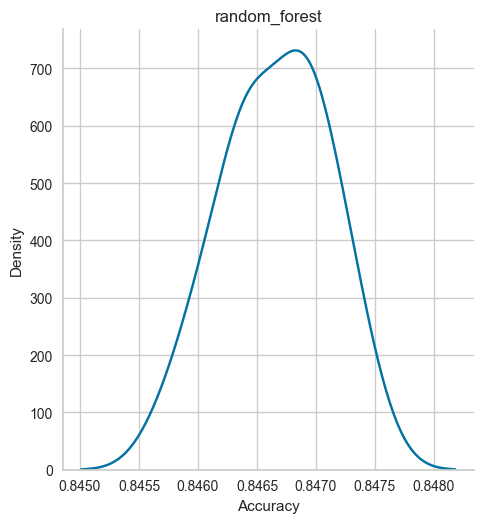

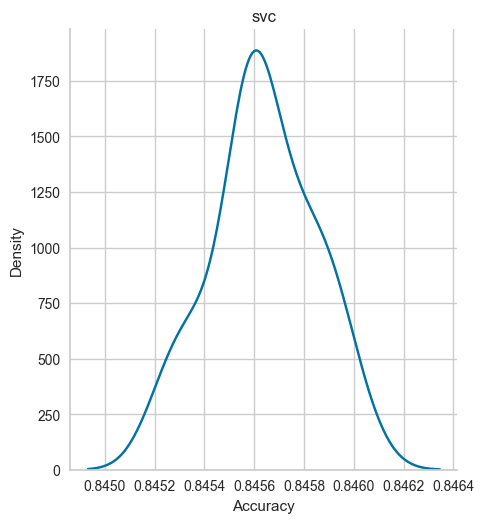

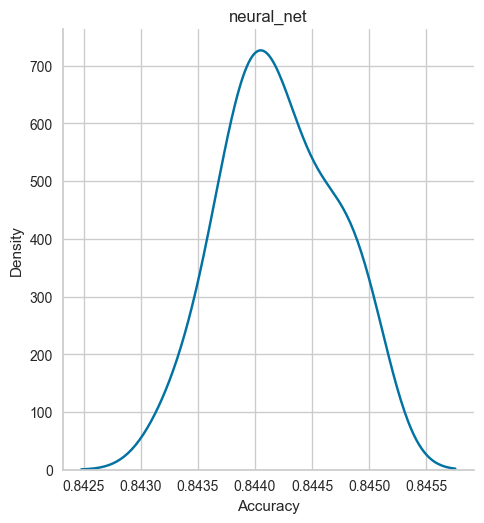

In [59]:
for i,col in enumerate(df_resultados.columns):
    sns.displot(df_resultados[col].values, kind = 'kde')
    plt.xlabel('Accuracy')
    plt.title(col)

### anova one_way

In [80]:
_, p = f_oneway(tree_results,random_forest_results,knn_results,linear_result,svm_result,nn_results,bayes_result)
p

np.float64(5.090282508519619e-295)

In [81]:
if p <= 0.05:
  print('Data are differents')
else:
  print('The results are equals')

Data are differents


### turkey

In [86]:
df_result_melt = pd.melt(df_resultados,var_name='model',value_name='accuracy')

In [89]:
model_compare = MultiComparison(df_result_melt['accuracy'], df_result_melt['model'])

In [90]:
statistic_test = model_compare.tukeyhsd()
print(statistic_test)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
        bayes           knn   0.0644    0.0  0.0636  0.0651   True
        bayes        linear    0.022    0.0  0.0212  0.0227   True
        bayes    neural_net   0.0774    0.0  0.0767  0.0782   True
        bayes random_forest   0.0799    0.0  0.0791  0.0807   True
        bayes           svc   0.0789    0.0  0.0781  0.0797   True
        bayes          tree   0.0672    0.0  0.0664   0.068   True
          knn        linear  -0.0424    0.0 -0.0432 -0.0416   True
          knn    neural_net   0.0131    0.0  0.0123  0.0139   True
          knn random_forest   0.0155    0.0  0.0148  0.0163   True
          knn           svc   0.0145    0.0  0.0137  0.0153   True
          knn          tree   0.0028    0.0   0.002  0.0036   True
       linear    neural_net   0.0555    0.0  0.0547  0.0563   